In [2]:
import math

from bayes_arcs import dynamic_computation as dc
from bayes_arcs import length_priors
from bayes_arcs import scoring
from bayes_arcs import synthetic_data
from bayes_arcs import segment_viz

In [3]:
from default_priors import arc_prior_tempo as arc_prior
import matplotlib.pyplot as plt

In [4]:
import numpy as np


AttributeError: module 'bayes_arcs.synthetic_data' has no attribute 'get_state'

 # Simple application of Arcs to a toy example

 Let's get some default priors for the arcs.

In [6]:
# Generate some segments
rng = np.random.default_rng()
test_segment = [math.ceil(x) for x in rng.normal(15, 5, size=10)]
print(test_segment)



[14, 16, 20, 10, 23, 16, 14, 19, 20, 16]


In [7]:
# Generate the actual data
(truth, sample_data) = synthetic_data.gen_data(test_segment, arc_prior)
print(len(sample_data), sample_data)



168 [166.56855850382826, 169.6082642214941, 169.2894002432306, 218.46690899007598, 157.34173065622053, 210.35077868000747, 194.0529736546417, 172.74299506395246, 177.93228245769527, 170.65432256081243, 156.76320711283716, 162.16977752404898, 139.17679970738612, 112.54824765243563, 188.41963589350007, 139.18176998904502, 193.4160094487773, 230.8704696548043, 193.33915590383214, 206.1687495208544, 183.18430291843825, 221.84474689261592, 170.02419333510767, 159.86213959716017, 145.1629959226168, 101.8384051757904, 131.3004452189921, 103.36066893955413, 97.70865964089948, 59.05634753312574, 71.51519493280979, 73.38606711425663, 127.32820013862053, 112.81382454627564, 117.67384983137018, 157.8952923946328, 129.31146321623865, 133.11752409920913, 136.7664450262847, 127.58669548360528, 112.67482162937247, 144.35927002678247, 84.23324611843347, 115.88785024822745, 109.59244444689783, 108.1044736781926, 128.66793105436835, 94.78542867028527, 101.45333854057236, 79.15941593718512, 165.5047197577

In [8]:
# Bind a length prior to our data
length_prior = length_priors.NormalLengthPrior(mean=15, stddev=5, x=list(range(len(sample_data))), max_length=30)



In [9]:
# Compute posterior marginals
posterior_marginals, post_segments = dc.run_alpha_beta(sample_data, arc_prior, length_prior, return_2d=True)



/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/bayes_arcs/dynamic_computation.py:54: RuntimeWarning: divide by zero encountered in log
  return np.log(lik_length)


/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/bayes_arcs/segment_viz.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


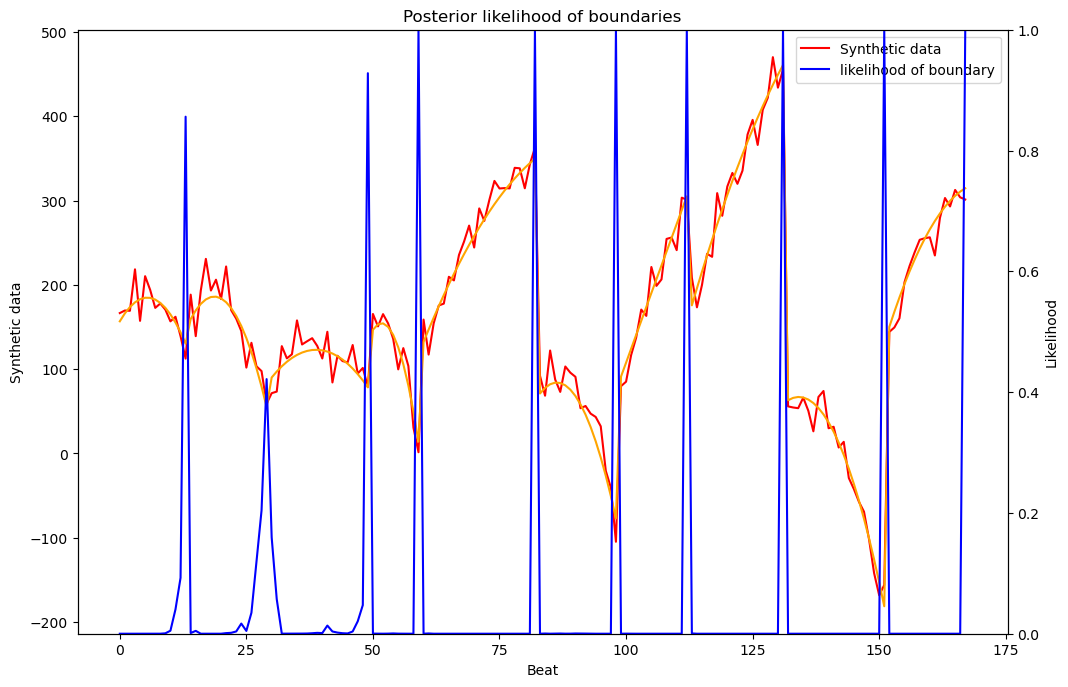

In [15]:
fig = segment_viz.plot_segment_with_signal(posterior_marginals, sample_data, data_time=range(len(sample_data)), input_label='Synthetic data', smoothing=1)
fig.get_axes()[0].plot(truth, "orange")
# fig.get_axes()[0].legend(['noisy', 'pure'], loc='upper left')

/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/bayes_arcs/segment_viz.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


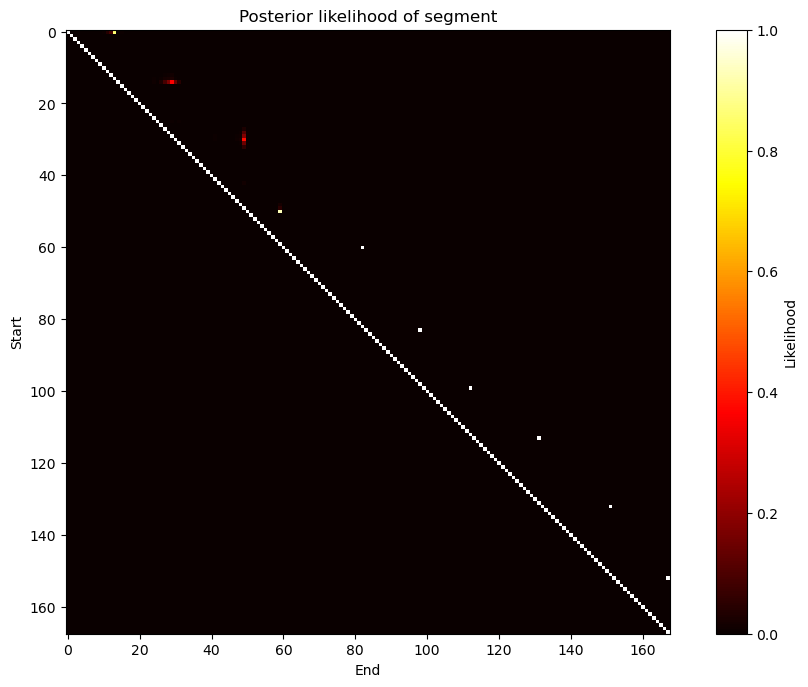

In [11]:
segment_viz.plot_segment_matrix(post_segments, smoothing=1)

/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/bayes_arcs/segment_viz.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


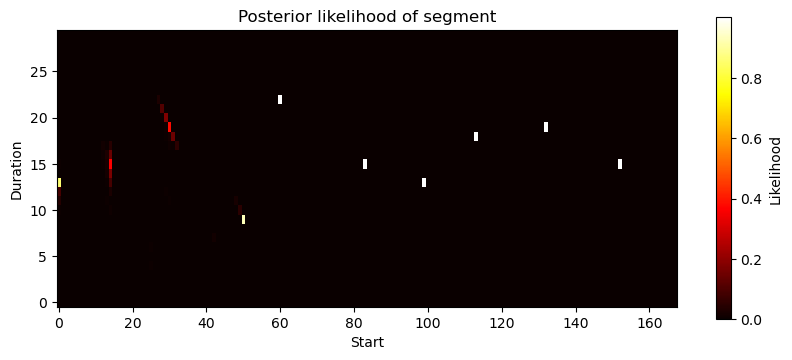

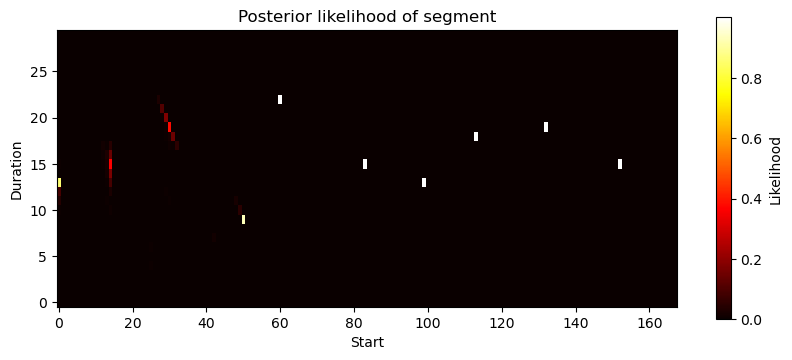

In [13]:
segment_viz.plot_segment_raindrop(post_segments, max_length=30, ratio=2.5)

/Users/guichaoua 1/Nextcloud/Workspace/ArcV2/bayes_arcs/segment_viz.py:66: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


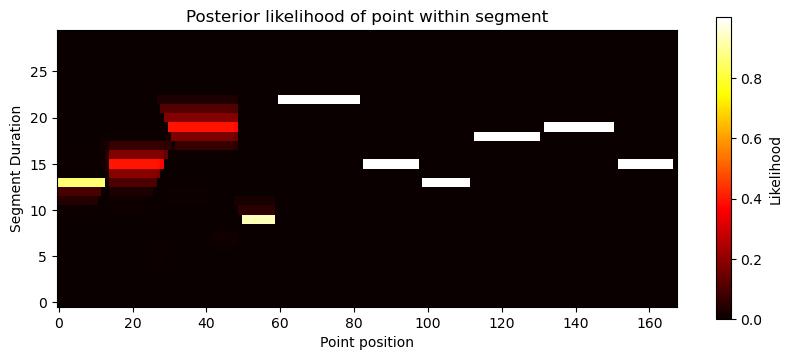

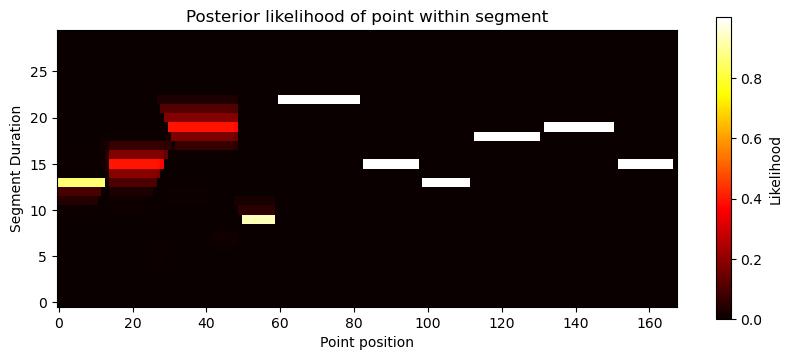

In [14]:
segment_viz.plot_segment_beams(post_segments, max_length=30, ratio=2.5)